In [1]:
//%jsroot on
TCanvas *c1 = new TCanvas("c1");

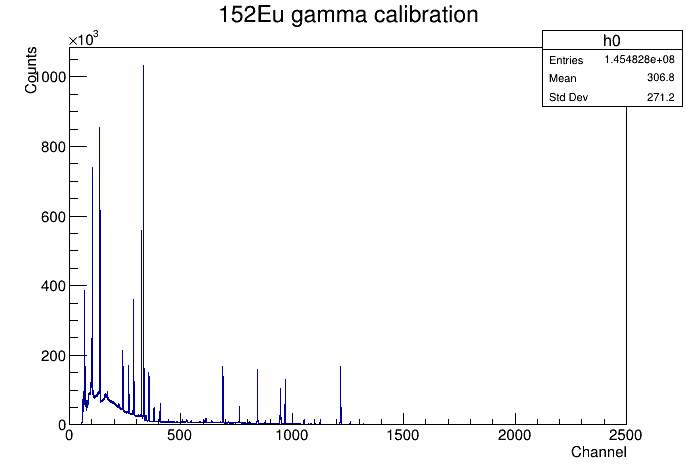

In [2]:
// 从文件中读取能谱

TFile *filer = new TFile("gamma.root","READ");// 以只读模式打开ROOT文件
if(!filer->IsOpen())
  {
    std::cout<<"Can't open root file"<<std::endl;
  }

TH1F *h_gammaraw = (TH1F*)filer->Get("h0");//通过指针读取原始gamma谱
// 通过指针 h_gammaraw 可对直方图进行操作

//gPad->SetLogy();

h_gammaraw->GetXaxis()->SetTitle("Channel");
h_gammaraw->GetYaxis()->SetTitle("Counts");
h_gammaraw->GetXaxis()->SetRangeUser(0, 2500);
h_gammaraw->Draw();

c1->Draw();


# 利用两点的值对刻度公式进行粗略计算
<font size =4>由Eu152的能谱可以知道，1217对应的能量为1408.0keV，969对应的能量为1112.1keV。利用这两个点对刻度公式进行粗略估计。

In [3]:
void Fit(TH1F *hist, double r_fit, double l_fit, double r_show, double l_show){
    hist->GetXaxis()->SetRangeUser(0, 2500);
    hist->Fit("gaus", " ", " ", r_fit, l_fit);
    hist->Draw();
    hist->GetXaxis()->SetRangeUser(r_show, l_show);
}

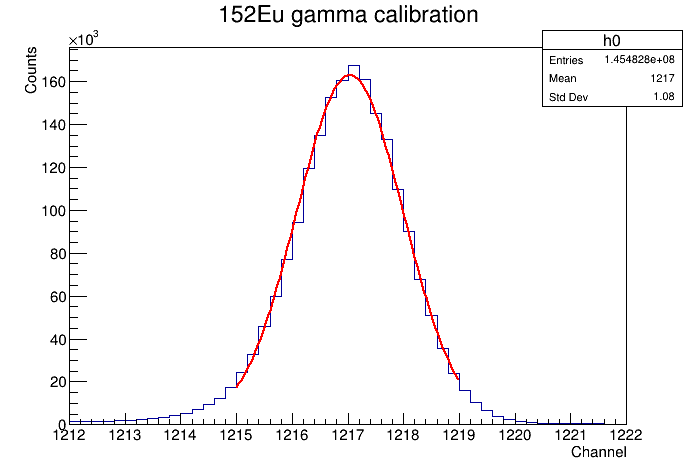

 FCN=1802.86 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.33435e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.62855e+05   1.56384e+02   2.45958e+00   1.93285e-06
   2  Mean         1.21705e+03   7.78963e-04   5.80332e-04  -5.41540e-01
   3  Sigma        9.58711e-01   7.45859e-04   4.33426e-06  -2.37119e-02


In [4]:
Fit(h_gammaraw, 1215, 1219, 1212, 1222);
c1->Draw();

<font size = 4>由Eu152的能谱可以得到，1217处的ch值为1217.05，sigma值为0.958，对应的能量为1408.0keV

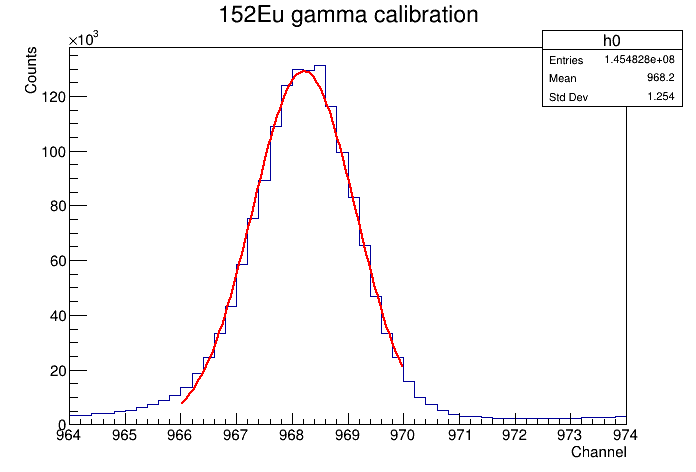

 FCN=4202.98 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=4.02073e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.29013e+05   1.42491e+02   3.39700e+00  -7.60905e-07
   2  Mean         9.68221e+02   8.55644e-04   4.61684e-04  -2.71289e-01
   3  Sigma        9.26576e-01   8.24707e-04   7.44600e-06   2.67977e-01


In [5]:
Fit(h_gammaraw, 966, 970, 964, 974);
c1->Draw();

<font size =4>由Eu152的能谱可以得到，969处的ch值为968.22，sigma为0.927，对应的能量为1112.1keV

In [6]:
double ch[2] = {1217.05, 968.22};
double ch_error[2] = {0.0008, 0.0009};
double en[2] = {1408, 1112.1};
double en_error[2] = {0., 0.};
TGraphErrors *h1 = new TGraphErrors(2,ch,en,ch_error,en_error);
TGraph *h2 = new TGraph(2,ch,en);

h2->GetXaxis()->SetTitle("Channel");
h2->GetYaxis()->SetTitle("Energy(keV)");

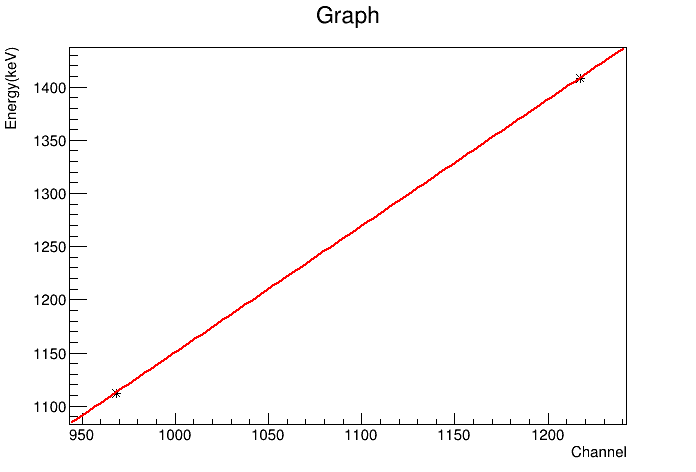


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  3.51552e-21
NDf                       =            0
Edm                       =  7.09492e-21
NCalls                    =           43
p0                        =     -39.2736   +/-   6.25007     
p1                        =      1.18917   +/-   0.00568345  


In [7]:
c1->Clear();
TF1 *linear_relation = new TF1("linear_relation", "[0]+[1]*x", 0, 2500);

double par0, par1;
h2->Fit("linear_relation");
par0 = linear_relation->GetParameter(0);
par1 = linear_relation->GetParameter(1);
h2->Draw("AP*");
c1->Draw();

<font size =4>由这个粗略的估计以及与能谱的对照可以知道，102对应的能量为81.0keV，136对应的能量为121.78keV，239对应的能量为244.7keV，266对应的能量为276.4keV，288对应的能量为302.9keV，323对应的能量为344.28keV，332对应的能量为356.0keV，688对应的能量为778.9kev，762对应的能量为867.37keV，843对应的能量为964.08keV;
    下面进行更精确的估计

# 对更多峰进行高斯拟合，并利用拟合参数获得更精确的刻度公式

In [8]:
Fit(h_gammaraw, 842, 845.5, 839, 847);
//c1->Draw();

 FCN=1678.45 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=6.33548e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.56144e+05   1.63579e+02   2.45535e+00  -5.01294e-08
   2  Mean         8.43844e+02   8.00489e-04   4.02376e-04   4.24844e-02
   3  Sigma        8.74932e-01   8.12287e-04   5.00914e-06  -5.85723e-02


<font size =4> 中心值为843.84，sigma为0.874

In [9]:
Fit(h_gammaraw, 761, 764, 758, 766);
//c1->Draw();

 FCN=546.066 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.31251e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.17608e+04   9.73413e+01   8.09622e-01  -4.84071e-06
   2  Mean         7.62608e+02   1.61396e-03   3.63640e-04  -1.09266e-01
   3  Sigma        9.16338e-01   1.92022e-03   6.59773e-06   3.72519e-02


<font size = 4> 中心值是762.60，sigma值为0.916

In [10]:
Fit(h_gammaraw, 686.5, 690, 685, 692);
//c1->Draw();

 FCN=1746.86 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=1.47873e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.61743e+05   1.66057e+02   2.57025e+00   4.82495e-07
   2  Mean         6.88198e+02   7.22039e-04   3.28158e-04   2.21565e-01
   3  Sigma        8.40422e-01   6.83694e-04   4.42968e-06   2.68632e-01


<font size =4>中心值是688.20，sigma值为0.840

In [11]:
Fit(h_gammaraw, 331, 334, 328, 336);
//c1->Draw();

 FCN=10309.6 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=6.25182e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.00417e+06   4.51864e+02   1.70070e+01  -2.08285e-06
   2  Mean         3.32754e+02   2.81683e-04   1.58669e-04  -1.80903e+00
   3  Sigma        7.11348e-01   2.66608e-04   4.91542e-06  -8.61829e+00


<font size =4>中心值是332.75，sigma值为0.711

In [12]:
Fit(h_gammaraw, 321.5, 324.5, 319, 327);
//c1->Draw();

 FCN=6197.32 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=9.10036e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.53173e+05   3.32822e+02   9.66409e+00   2.18679e-06
   2  Mean         3.22884e+02   3.68731e-04   1.53963e-04  -3.28529e+00
   3  Sigma        7.24493e-01   3.56917e-04   5.07880e-06   3.73849e+00


<font size =4>中心值是322.88，sigma值为0.724

In [13]:
Fit(h_gammaraw, 286.5, 290, 284, 292);
//c1->Draw();

 FCN=20092.4 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=2.50682e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.32551e+05   2.50396e+02   1.29096e+01  -1.09324e-06
   2  Mean         2.88054e+02   4.71661e-04   1.37355e-04  -1.98992e-01
   3  Sigma        7.79770e-01   4.53530e-04   1.03533e-05  -8.00417e-01


<font size =4>中心值是288.05，sigma值为0.780

In [14]:
Fit(h_gammaraw, 264.5, 267, 262, 270);
//c1->Draw();

 FCN=2821.93 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=2.09161e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.60155e+05   1.82369e+02  -8.88468e-02   2.40903e-07
   2  Mean         2.65806e+02   9.04701e-04  -1.09661e-06   3.22454e-02
   3  Sigma        8.27303e-01   1.12401e-03  -8.59851e-07   1.93323e-01


<font size =4>中心值是265.81，sigma值为0.827

In [15]:
Fit(h_gammaraw, 238, 240.5, 235, 243);
//c1->Draw();

 FCN=1575.22 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=1.95556e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.11495e+05   2.10717e+02   2.97140e+00  -1.26077e-06
   2  Mean         2.39196e+02   7.60790e-04   1.14057e-04  -2.83777e-01
   3  Sigma        8.04965e-01   9.12492e-04   6.06248e-06   7.84876e-01


<font size =4>中心值是239.20，sigma值为0.805

In [16]:
Fit(h_gammaraw, 135, 137.5, 132, 140);
//c1->Draw();

 FCN=16996.8 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=1.93062e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.08372e+05   4.23126e+02   1.02763e+00  -1.59667e-09
   2  Mean         1.35976e+02   3.78992e-04  -3.44666e-07  -5.95991e-03
   3  Sigma        7.09451e-01   3.83490e-04  -4.34694e-07   1.24118e-03


<font size =4> 中心值是135.98，sigma值为0.709

In [17]:
Fit(h_gammaraw, 100.5, 103, 98, 106);
//c1->Draw();

 FCN=15359.4 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.32243e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.92697e+05   3.89074e+02   1.72005e+01   1.76172e-06
   2  Mean         1.01646e+02   3.75822e-04   4.84686e-05   3.14401e-01
   3  Sigma        7.41330e-01   4.23501e-04   9.33418e-06   2.03850e+00


<font size =4>中心值是101.64，sigma值为0.741

- 对一次函数形式的刻度函数进行拟合

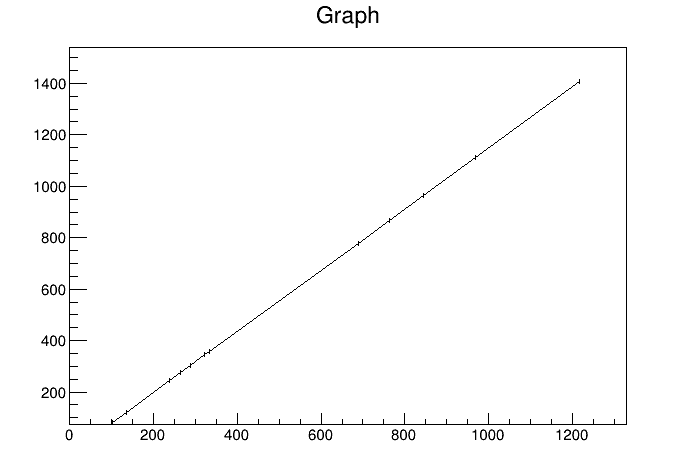


****************************************
Minimizer is Minuit / Migrad
Chi2                      =    0.0859737
NDf                       =           10
Edm                       =  8.99487e-21
NCalls                    =           40
p0                        =     -39.8436   +/-   0.0475225   
p1                        =      1.18969   +/-   7.64204e-05 


In [18]:
double ch_pre[12] = {101.64, 135.98, 239.0, 265.81, 288.05, 322.88, 332.75, 688.20, 762.60, 843.84, 968.22, 1217.05};
double ch_error_pre[12] = {3.75822e-04, 3.78992e-04, 7.60790e-04, 9.04701e-04, 4.71661e-04, 3.68731e-04, 2.81683e-04, 7.22039e-04, 1.61396e-03, 8.00489e-04, 8.55644e-04, 7.78963e-04};
double en_pre[12] = {81.0, 121.78, 244.7, 276.4, 302.9, 344.28, 356.0, 778.9, 867.37, 964.08, 1112.1, 1408.0};
double en_error_pre[12] = {0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0};

TGraphErrors *h1_pre = new TGraphErrors(12,ch_pre,en_pre,ch_error_pre,en_error_pre);
TGraph *h2_pre = new TGraph(12,ch_pre,en_pre);

h2_pre->GetXaxis()->SetTitle("Channel");
h2_pre->GetYaxis()->SetTitle("Energy(keV)");

c1->Clear();
TF1 *linear_relation_pre = new TF1("linear_relation_pre", "[0]+[1]*x");

double par0_pre, par1_pre;
h2_pre->Fit("linear_relation_pre");
par0_pre = linear_relation_pre->GetParameter(0);
par1_pre = linear_relation_pre->GetParameter(1);
h1_pre->Draw("ALP");
c1->Draw();

<font size =4> 此时刻度公式的系数的不确定值大大缩小了，p0的不确定值由原来的6缩小为0.05，p1的不确定值由原来的0.006缩小为7.64204e-05

- 对二次函数形式的刻度公式进行拟合

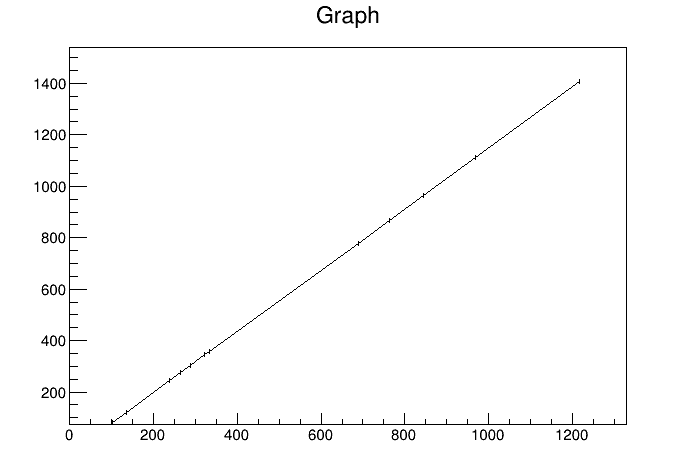


****************************************
Minimizer is Minuit / Migrad
Chi2                      =    0.0756632
NDf                       =            9
Edm                       =  4.43769e-15
NCalls                    =           66
p0                        =     -39.9171   +/-   0.0813384   
p1                        =      1.19005   +/-   0.000336946 
p2                        = -2.93066e-07   +/-   2.64633e-07 


In [19]:
TF1 *poly_relation = new TF1("poly_relation", "[0]+x*[1]+x*x*[2]", 0, 2500);
h2_pre->Fit("poly_relation");
h1_pre->Draw("ALP");
c1->Draw();


<font size =4> 由此可见，其二次项系数非常小，因此HPGe探测器在0-2500ch值范围内保持了很好的线性关系

# 利用上述关系将能谱还原为刻度后的能谱
- 一次函数

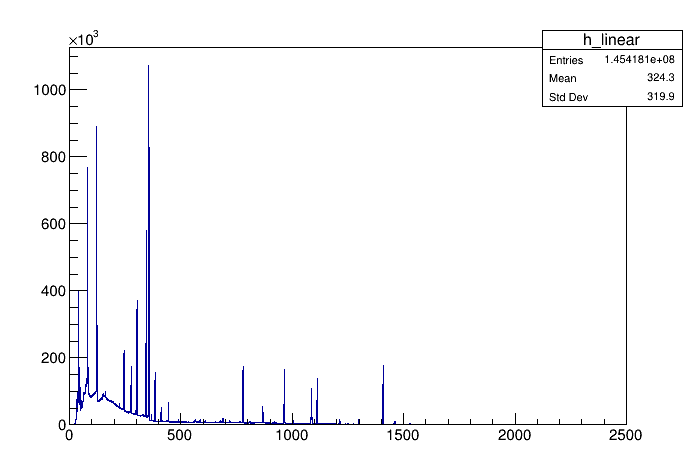

In [20]:
TH1D *h_linear = new TH1D("h_linear","",10000,0,2500);//h1为刻度后的gamma谱
    TRandom3 *r = new TRandom3(0);
    int Nbins = h_gammaraw->GetXaxis()->GetNbins(); //h0为未刻度的gamma谱。
    for(int i=0; i<Nbins; i++)
    {
        
        Long64_t eN = h_gammaraw->GetBinContent(i);// GetBinContent()提取每个bin的计数
        Double_t e = h_gammaraw->GetBinLowEdge(i);// GetBinLowEdge()提取每个bin左边界的横坐标x。
        for(Long64_t j=0; j<eN; j++)
        {
            Double_t ea = e+r->Rndm()*0.2;// 添加随机数是为了将该bin中填充的事例的值均匀的遍布整个bin
            ea=par1_pre*ea+par0_pre;//p0,p1,p2为上面获得的二次项刻度系数。
            h_linear->Fill(ea);
        }
    }
h_linear->Draw();
c1->Draw();

- 二次函数

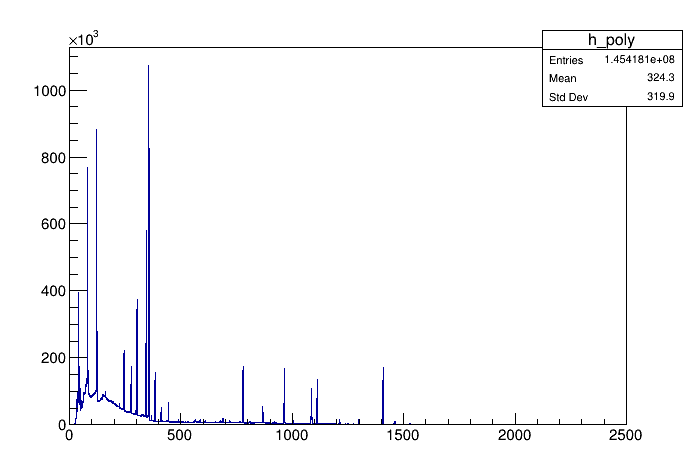

In [21]:
TH1D *h_poly = new TH1D("h_poly","",10000,0,2500);//h1为刻度后的gamma谱
    for(int i=0; i<Nbins; i++)
    {
        
        Long64_t eN = h_gammaraw->GetBinContent(i);// GetBinContent()提取每个bin的计数
        Double_t e = h_gammaraw->GetBinLowEdge(i);// GetBinLowEdge()提取每个bin左边界的横坐标x。
        for(Long64_t j=0; j<eN; j++)
        {
            Double_t ea = e+r->Rndm()*0.2;// 添加随机数是为了将该bin中填充的事例的值均匀的遍布整个bin
            ea=1.19*ea-39.92-2.93066e-07*ea*ea;//p0,p1,p2为上面获得的二次项刻度系数。
            h_poly->Fill(ea);
        }
    }
h_poly->Draw();
c1->Draw();

# 残差图评估校准

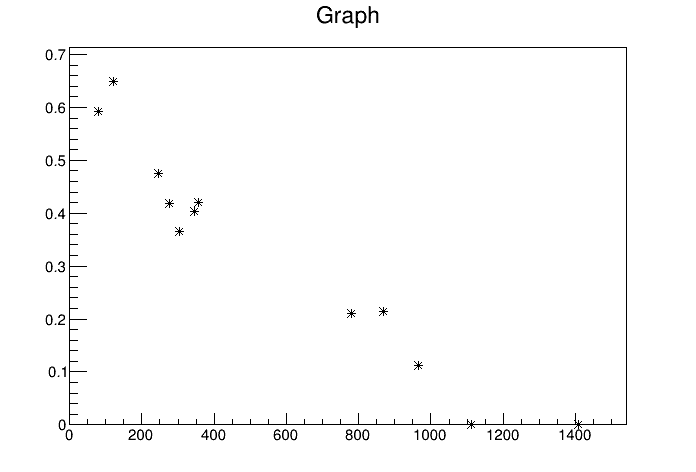

In [22]:
double en_stan[12] = {81, 121.78, 244.7, 276.4, 302.9, 344.28, 356.0, 778.9, 867.37, 964.08, 1112.1, 1408};
double minus[12] = {par0+par1*101.64-81, par0+par1*135.98-121.78, par0+par1*239.2-244.7, par0+par1*265.81-276.4, par0+par1*288.05-302.9, par0+par1*322.88-344.28, par0+par1*332.75-356.0, par0+par1*688.20-778.9, par0+par1*762.6-867.37, par0+par1*843.84-964.08, par0+par1*968.22-1112.1, par0+par1*1217.05-1408};
TGraph *test = new TGraph(12,en_stan,minus);
test->Draw("AP*");
c1->Draw();

<font size =4> 可见线性关系的残差均小于1keV说明校准比较成功